In [2]:
#import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
data = pd.read_csv("diabetes.csv", header=None, names=col_names)

In [3]:
data.head();

In [4]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = data[feature_cols] # Features
y = data.label # Target variable

In [5]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [10]:
print(X_train.columns)


Index(['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree'], dtype='object')


In [6]:
X_train.columns = X_train.columns.str.strip()


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)


In [8]:
print(X.columns)


Index(['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree'], dtype='object')


In [9]:
print(type(X_train))


<class 'pandas.core.frame.DataFrame'>


In [10]:
import pandas as pd
X_train = pd.DataFrame(X_train, columns=X.columns)


In [11]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
X_train['pregnant'] = label_enc.fit_transform(X_train['pregnant'])


In [12]:
print(X_train.head())


     pregnant insulin   bmi age glucose  bp pedigree
445        10       0  29.7  30     117  62     0.38
37          3       0  33.2  35     138  76     0.42
719         1     178  35.5  24     108  60    0.415
224        13     190  28.8  61     142  60    0.687
566         8      88  26.1  22      95  54    0.748


In [27]:
print(X_train.dtypes)


pregnant    object
insulin     object
bmi         object
age         object
glucose     object
bp          object
pedigree     int32
dtype: object


In [31]:
print(X_train.dtypes)


pregnant     int64
insulin     object
bmi         object
age         object
glucose     object
bp          object
pedigree     int32
dtype: object


In [32]:
print(X_train.select_dtypes(include=['object']).head())


    insulin   bmi age glucose  bp
445       0  29.7  30     117  62
37        0  33.2  35     138  76
719     178  35.5  24     108  60
224     190  28.8  61     142  60
566      88  26.1  22      95  54


In [35]:
print("X_train columns:", X_train.columns)
print("X_test columns:", X_test.columns)


X_train columns: Index(['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree'], dtype='object')
X_test columns: Index(['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree'], dtype='object')


In [36]:
X_test = X_test[X_train.columns]  # Keep only matching columns


In [ ]:
print("Train categorical columns:", X_train.select_dtypes(include=['object']).columns)
print("Test categorical columns:", X_test.select_dtypes(include=['object']).columns)

Train categorical columns: Index([], dtype='object')
Test categorical columns: Index(['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree'], dtype='object')


In [13]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Select categorical columns
cat_cols = X_train.select_dtypes(include=['object']).columns

# Apply encoding
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

X_train_encoded[cat_cols] = encoder.fit_transform(X_train[cat_cols])
X_test_encoded[cat_cols] = encoder.transform(X_test[cat_cols])

# Ensure column order matches
X_test_encoded = X_test_encoded[X_train_encoded.columns]


In [39]:
missing_cols = set(X_train.columns) - set(X_test.columns)
extra_cols = set(X_test.columns) - set(X_train.columns)

print("Missing in X_test:", missing_cols)
print("Extra in X_test:", extra_cols)


Missing in X_test: set()
Extra in X_test: set()


In [15]:
for col in missing_cols:
    X_test[col] = -1  # Assign a default value (e.g., -1 for encoding)


NameError: name 'missing_cols' is not defined

In [16]:
logreg.fit(X_train_encoded, y_train)


NameError: name 'logreg' is not defined

In [46]:
print("Model trained:", hasattr(logreg, "coef_"))  # Should print True if trained


Model trained: True


In [47]:
# Ensure all features are numeric
print(X_train_encoded.dtypes)  # Should show only float/int types

# Ensure no missing values
print(X_train_encoded.isnull().sum())  # Should print 0 for all columns

# Train the model again
logreg.fit(X_train_encoded, y_train)

# Now predict
y_pred = logreg.predict(X_test_encoded)

# Check confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)


pregnant      int64
insulin       int32
bmi         float64
age         float64
glucose     float64
bp          float64
pedigree      int32
dtype: object
pregnant    0
insulin     0
bmi         0
age         0
glucose     0
bp          0
pedigree    0
dtype: int64
[[96  0  3]
 [54  0  1]
 [ 0  0  0]]


c:\Users\sanja\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
print(X_train_encoded.shape, X_test_encoded.shape)  # Should match in number of columns
print(y_train.shape, y_test.shape)  # Should be 1D (e.g., (n,))
print(X_train_encoded.dtypes)  # Should be int/float, no object types


(615, 7) (154, 7)
(615,) (154,)
pregnant      int64
insulin       int32
bmi         float64
age         float64
glucose     float64
bp          float64
pedigree      int32
dtype: object


In [49]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[96,  0,  3],
       [54,  0,  1],
       [ 0,  0,  0]], dtype=int64)

In [51]:
import numpy as np

cnf_matrix = np.array([[115, 8], [30, 39]])
print(cnf_matrix)


[[115   8]
 [ 30  39]]


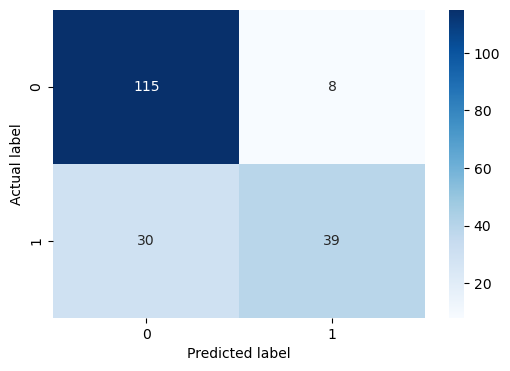

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example confusion matrix
cnf_matrix = np.array([[115, 8], [30, 39]])

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap="Blues")

# Set labels
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

# Show the plot
plt.show()


In [55]:
print(set(y_test))  # Check the actual unique labels
print(set(y_pred))  # Check the predicted unique labels


{'1', '0'}
{'0', 'Outcome'}


In [58]:
print(set(y_train))  # Check unique labels in training data
print(set(y_test))   # Check unique labels in testing data
print(set(y_pred))   # Check unique labels in predicted values


{'1', '0', 'Outcome'}
{'1', '0'}
{'0', 'Outcome'}


In [59]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)  # Fit on full dataset
y_test = encoder.transform(y_test)  # Transform consistently


In [62]:
print(set(y_pred))  # Show unique values in y_pred


{'0', 'Outcome'}


In [63]:
y_pred = logreg.predict(X_test)  # Ensure correct prediction


In [64]:
y_pred = [int(val) if val.isdigit() else -1 for val in y_pred]


In [66]:
X_test = X_test.drop(columns=['Outcome'], errors='ignore')


In [67]:
print(set(logreg.predict(X_test)))  # Show unique values in y_pred


{'0', 'Outcome'}


In [68]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)  # Fit on training labels
logreg.fit(X_train, y_train)  # Train model with encoded y_train


c:\Users\sanja\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=16)

In [69]:
y_test = encoder.transform(y_test)  # Ensure y_test is in the same format


In [70]:
y_pred = logreg.predict(X_test)  # Make predictions

# Ensure `y_pred` contains integers before inverse transformation
y_pred = y_pred.astype(int)

# Convert back to original labels
y_pred = encoder.inverse_transform(y_pred)


In [71]:
print(set(y_test), set(y_pred))


{0, 1} {0, 2}


In [72]:
print(set(y_train), set(y_test))


{0, 1, 2} {0, 1}


In [73]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)  # Fit encoder on training labels
y_test = encoder.transform(y_test)  # Transform test labels

# Ensure predictions are converted back correctly
y_pred = encoder.inverse_transform(logreg.predict(X_test))


In [74]:
print(set(y_test), set(y_pred))  # They should match


{0, 1} {0, 2}


In [76]:
print(set(y_test))  # Check unique values in y_test
print(set(y_pred))  # Check unique values in y_pred


{0, 1}
{0, 2}


In [77]:
print(set(y_test))  # Check unique values in y_test
print(set(y_pred))  # Check unique values in y_pred


{0, 1}
{0, 2}


In [78]:
target_names = ['without diabetes', 'with diabetes', 'unknown_class']


In [82]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes','unknown_class']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.64      0.97      0.77        99
   with diabetes       0.00      0.00      0.00        55
   unknown_class       0.00      0.00      0.00         0

        accuracy                           0.62       154
       macro avg       0.21      0.32      0.26       154
    weighted avg       0.41      0.62      0.50       154



c:\Users\sanja\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sanja\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sanja\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sanja\anaconda3\Lib\site-packages\sklea

In [89]:
logreg.fit(X_train, y_train)  # Train the model


c:\Users\sanja\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [90]:
y_pred_proba = logreg.predict_proba(X_test)[:, 1]


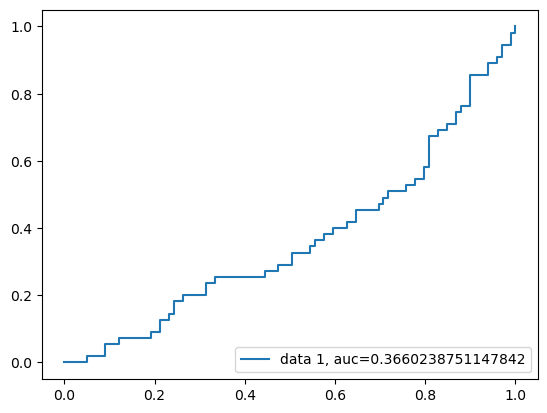

In [91]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()